In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [16]:
data_train = pd.read_csv('titanic_train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data_train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [18]:
data_test = pd.read_csv('titanic_test.csv')


In [22]:
data = pd.concat([data_train,data_test])

In [25]:
data = data[['Survived','Age','Fare']]

In [27]:
data.isnull().mean()

Survived    0.319328
Age         0.200917
Fare        0.000764
dtype: float64

In [33]:
data.isnull().sum()

Survived    418
Age         263
Fare          1
dtype: int64

In [34]:
data.shape

(1309, 3)

In [40]:
# Let's separate data into training and training set.

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],  # predictors
    data['Survived'],  # target
    test_size=0.5,  # percentage of obs in test set
    random_state=0)

X_train.shape, X_test.shape

((654, 2), (655, 2))

In [79]:
X_train.isnull().mean()*100

Age           19.571865
Fare           0.152905
Age_median     0.000000
Age_mean       0.000000
dtype: float64

In [70]:
# Calculate the median age.

median = X_train.Age.median()
median

28.0

In [74]:
# Calculate the mean age.

mean = X_train.Age.mean()
mean = np.round(mean,1)
mean

30.0

In [76]:
X_train['Age_median'] = X_train['Age'].fillna(median)

In [77]:
X_train['Age_mean'] = X_train['Age'].fillna(mean)

In [78]:
X_train.head(15)

,Age,Fare,Age_median,Age_mean
293,24.0,8.8500,24.0,24.0
76,NaN,7.8958,28.0,30.0
48,NaN,21.6792,28.0,30.0
689,15.0,211.3375,15.0,15.0
304,NaN,7.7500,28.0,30.0
291,30.0,6.9500,30.0,30.0
332,38.0,153.4625,38.0,38.0
576,34.0,13.0000,34.0,34.0
622,20.0,15.7417,20.0,20.0
564,NaN,8.0500,28.0,30.0


In [81]:
# We can see a change in the variance after mean/median imputation.
# This is expected, because the percentage of missing data is quite high
# in Age, ~20%

print('Original Age Variance: ', X_train['Age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original Age Variance:  217.0297415071519
Variance after median imputation:  175.1015829354988
Variance after mean imputation:  174.48803942191063


As expected, the variance, is underestimated because many values are now the same because of mean or median imputation.

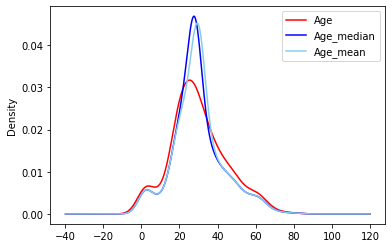

In [102]:
# We can se that the distribution has changed:
# There are now more values towards the median or mean.

fig = plt.figure()
ax =fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with the median
X_train['Age_median'].plot(kind='kde',ax=ax,color='blue')

# Variable imputed with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='skyblue')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

### Effect of covariance with mean/median imputation

In [104]:
X_train.cov()

,Age,Fare,Age_median,Age_mean
Age,217.029742,149.381245,217.029742,217.029742
Fare,149.381245,2477.510563,124.760485,119.845438
Age_median,217.029742,124.760485,175.101583,174.479503
Age_mean,217.029742,119.845438,174.479503,174.488039


<AxesSubplot:>

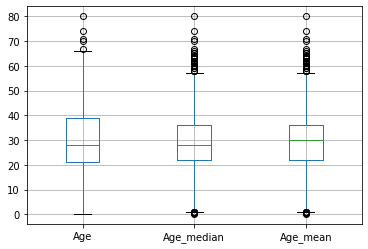

In [105]:
# The mean / median impuation may lead inliers to look like outliers

# In other words, mean/median imputation may lead to an increase in the 
# number of detected outliers.

# Let's find out using a box plot

X_train[['Age','Age_median','Age_mean']].boxplot()

# House Prices Dataset

In [106]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [110]:
data = pd.read_csv('train.csv',usecols=cols_to_use)

In [111]:
print(data.shape)

(1460, 10)


In [112]:
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [114]:
null_cols = [var for var in data.columns if data[var].isnull().mean() > 0]

In [115]:
null_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [118]:
data[null_cols].isnull().mean()*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1], data['SalePrice'],
    test_size=0.3,
    random_state=0,
)


X_train.shape, X_test.shape

((1022, 9), (438, 9))

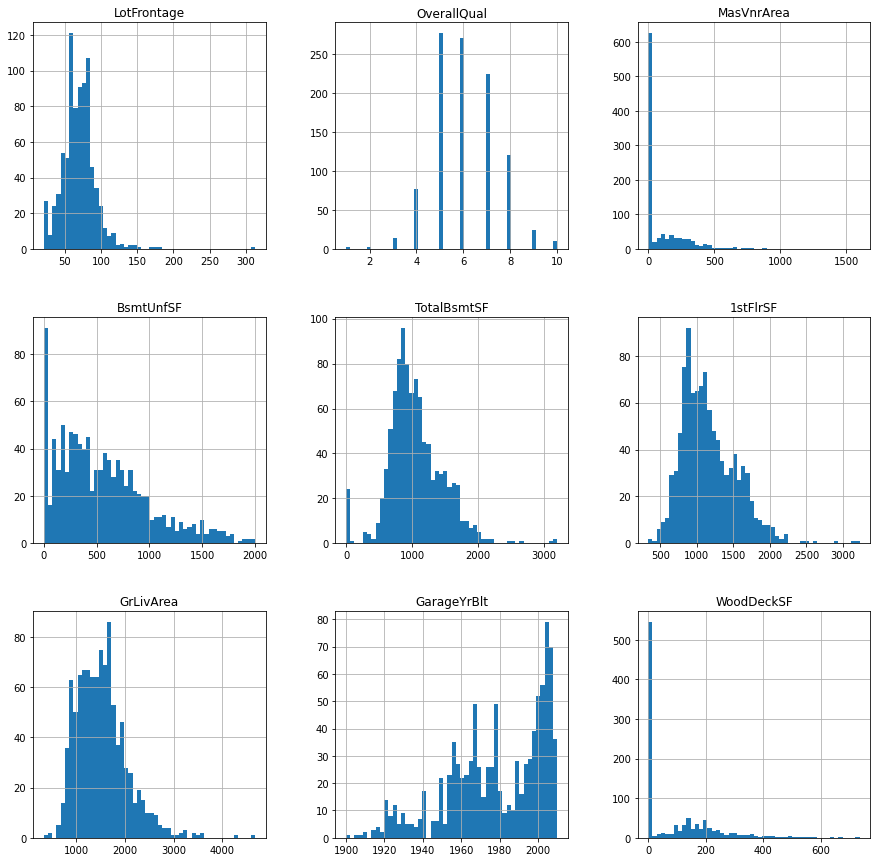

In [129]:
X_train.hist(bins=50,figsize=(15,15))
plt.show()

In [138]:
for i in null_cols:
    print(i)

LotFrontage
MasVnrArea
GarageYrBlt


In [167]:
for i in null_cols:
    median = X_train[i].median()
    
    X_train[i+str('_median')] = X_train[[i]].fillna(median)
    
    X_train[i+str('_median')]

X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576,69.0,573.0,1998.0
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307,69.0,0.0,1996.0
960,50.0,5,0.0,162,858,858,858,NaN,117,50.0,0.0,1979.0
1384,60.0,6,0.0,356,560,698,1258,1939.0,0,60.0,0.0,1939.0
1100,60.0,2,0.0,0,290,438,438,1930.0,0,60.0,0.0,1930.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,89,1252,1268,2365,1999.0,0,82.0,673.0,1999.0
835,60.0,4,0.0,625,1067,1067,1067,1996.0,290,60.0,0.0,1996.0
1216,68.0,6,0.0,0,0,1318,1902,1978.0,0,68.0,0.0,1978.0
559,NaN,7,18.0,1374,1374,1557,1557,2003.0,143,69.0,18.0,2003.0


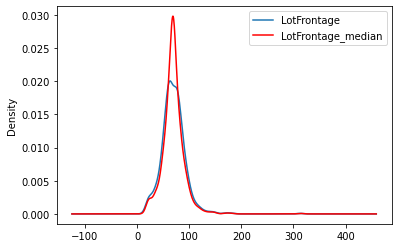

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable imputation
X_train['LotFrontage'].plot(kind='kde',ax=ax)

# Variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde',ax=ax,color='red')

# Add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

plt.show()

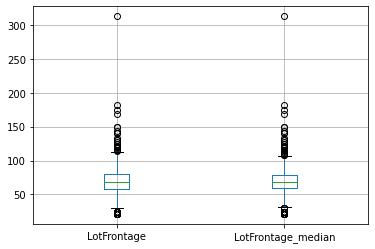

In [175]:
X_train[['LotFrontage','LotFrontage_median']].boxplot()
plt.show()